# Topic Modeling
### ... in a nutshell:

<img src="https://moj-analytical-services.github.io/NLP-guidance/LDAresults.png" alt="lda" style="width: 600px;"/>

Partially based on [this blogpost](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/) by Selva Prabhakaran.

In [1]:
import sys
import re, numpy as np
from pprint import pprint

We will need to draw some plots:

In [2]:
! pip install gensim -U


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings, logging
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

We again use Gensim library, but now we work with its topic modelling features.

In [4]:
# Gensim
import gensim
from gensim import corpora

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...


True

NLTK toolkit provides us with a corpus and additional tools:

In [6]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'wa', 'also', 'may', 'take', 'come'])

In [7]:
# Import Dataset
import nltk
nltk.download('gutenberg')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...


True

Let us take Lewis Carroll's "Alice in Wonderland" and preprocess it:

In [8]:
alice = nltk.corpus.gutenberg.sents('carroll-alice.txt')

In [9]:
alice[0]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']']

In [10]:
from nltk.tokenize import word_tokenize
def simple_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token.strip("'") for token in tokens if len(token.strip("'")) > 2]
    return tokens

In [11]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def process_words(texts):
    """Remove stopwords and lemmatize"""
    texts_out = []
    for sent in texts:
        texts_out.append([wnl.lemmatize(token) for token in sent])
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out

data_ready = process_words(alice)  # processed Text Data!

### Building LDA model

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [13]:
data_ready[0]

['alice', 'adventures', 'wonderland', 'lewis', 'carroll', '1865']

In [14]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

In [15]:
alice[0]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']']

The topic modelling we use is Latent Dirichlet Allocation. We have to skip the details here, but you can find all the details in [the original paper](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf). Or you can look at the very well-explained "from scratch" [tutorial](https://medium.com/@corymaklin/latent-dirichlet-allocation-dfcea0b1fddc#:~:text=Latent%20Dirichlet%20Allocation%2C%20or%20LDA%20for%20short%2C%20is%20an%20unsupervised,of%20clusters%20(i.e.%20topics).).

In [16]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.174*"said" + 0.067*"alice" + 0.033*"long" + 0.025*"child" + 0.024*"head" '
  '+ 0.020*"must" + 0.017*"keep" + 0.017*"began" + 0.015*"added" + '
  '0.012*"tone"'),
 (1,
  '0.045*"little" + 0.037*"voice" + 0.031*"eye" + 0.028*"rabbit" + '
  '0.022*"simple" + 0.021*"shrill" + 0.017*"day" + 0.016*"sister" + '
  '0.016*"gave" + 0.015*"hand"'),
 (2,
  '0.054*"queen" + 0.028*"pig" + 0.028*"jury" + 0.025*"slate" + 0.025*"time" + '
  '0.023*"never" + 0.018*"half" + 0.017*"grown" + 0.015*"guinea" + '
  '0.015*"though"'),
 (3,
  '0.072*"king" + 0.034*"white" + 0.030*"one" + 0.027*"knew" + 0.025*"teacup" '
  '+ 0.019*"air" + 0.018*"first" + 0.018*"sat" + 0.013*"dormouse" + '
  '0.013*"gryphon"'),
 (4,
  '0.035*"change" + 0.033*"turtle" + 0.032*"mock" + 0.022*"sob" + '
  '0.018*"hatter" + 0.017*"way" + 0.016*"march" + 0.016*"hare" + '
  '0.016*"nothing" + 0.015*"hear"')]


### Plotting corpora stats

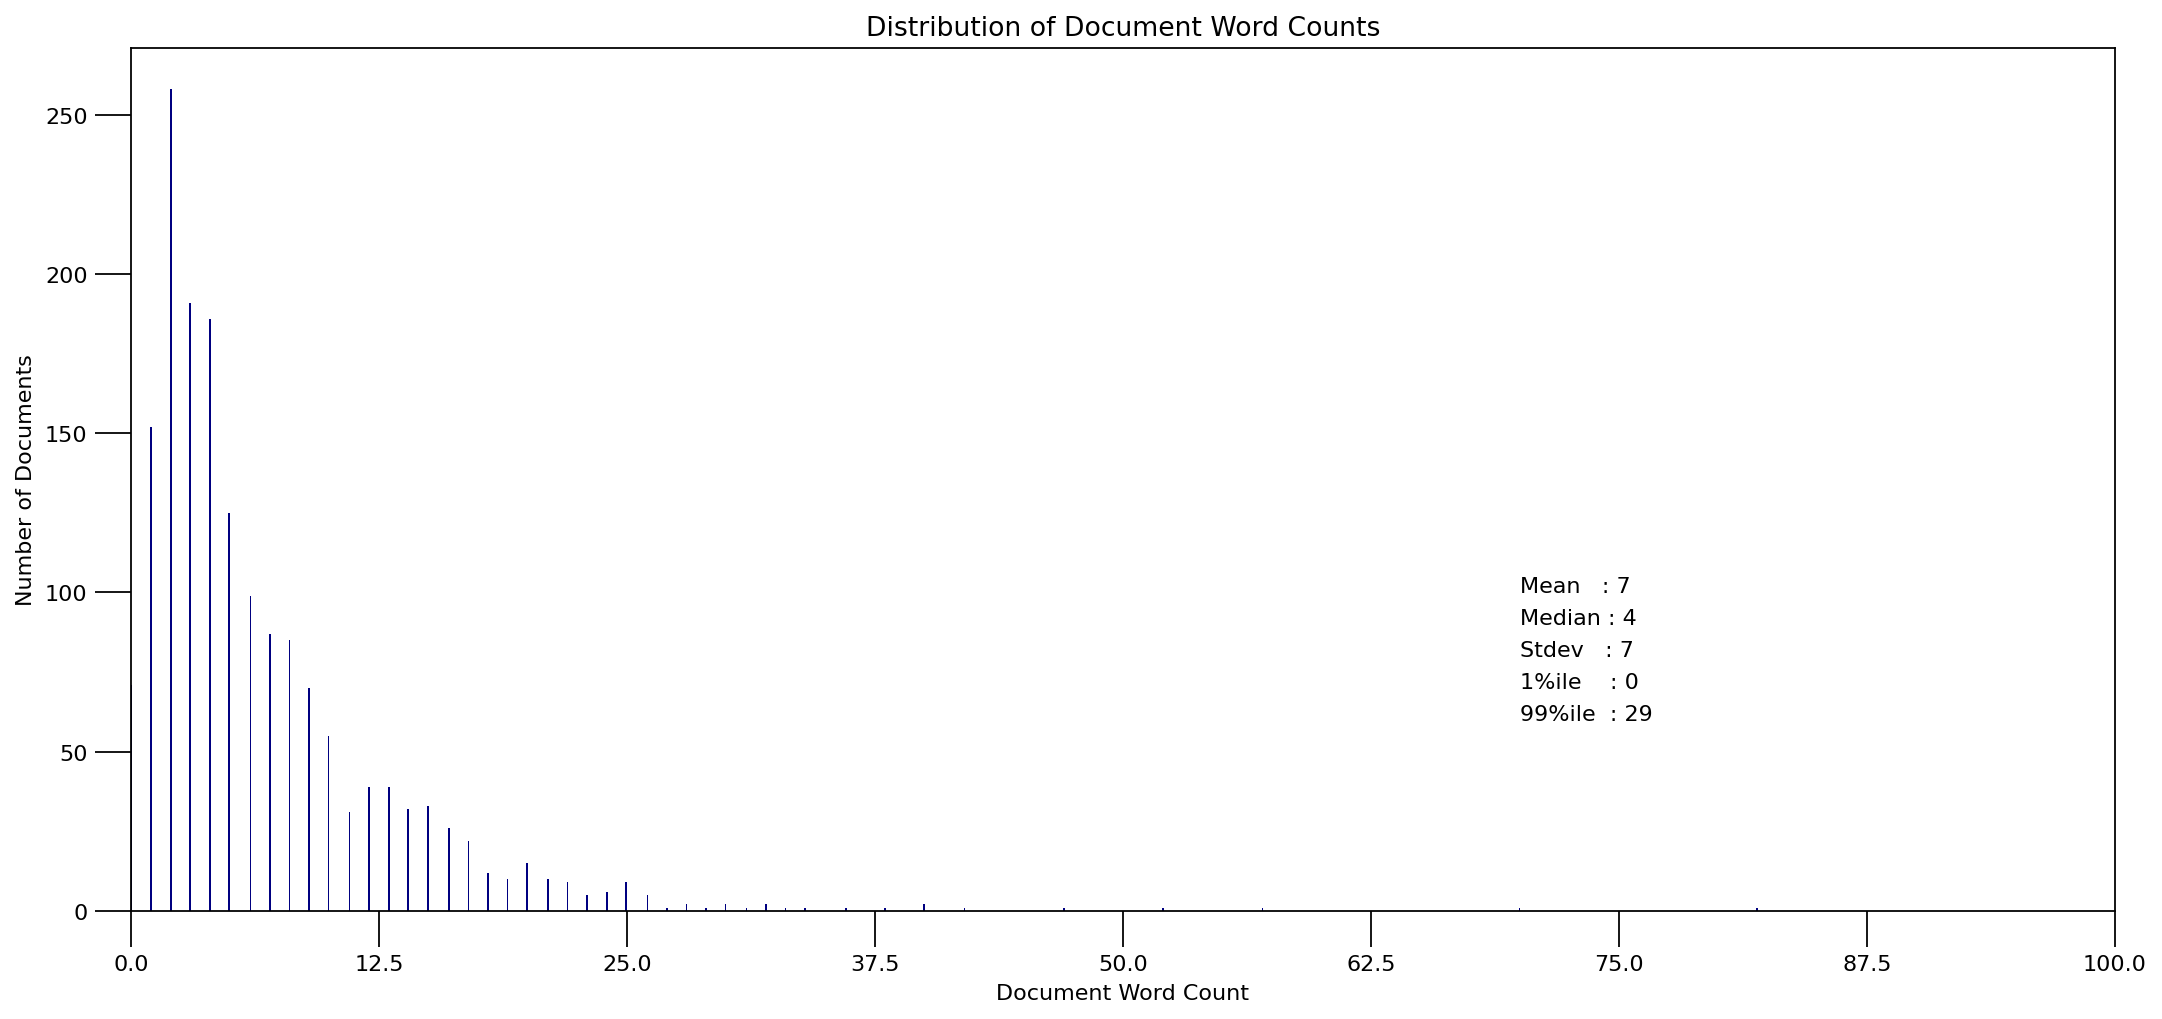

In [17]:
doc_lens = [len(d) for d in data_ready]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(70, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(70,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(70,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(70,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(70,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts')
plt.show()

**Suggestion:** you can try plotting document lenth distribution by topic

### Plot Word Count and Weights of Topic Keywords

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. Afterwards, you can try adding some of those words to stopwords as they are not important for your task

In [18]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = {}
for i, topic in topics:
    if i  not in out:
        out[i] = {'word': [], 'importance': [], 'word_count': []}
    for word, weight in topic:
        out[i]["word"].append(word)
        out[i]["importance"].append(weight)
        out[i]["word_count"].append(counter[word])

In [19]:
out

{0: {'word': ['said',
   'alice',
   'long',
   'child',
   'head',
   'must',
   'keep',
   'began',
   'added',
   'tone'],
  'importance': [0.17428015,
   0.06719233,
   0.032777533,
   0.02525021,
   0.023965348,
   0.01987391,
   0.01709547,
   0.016599705,
   0.014778257,
   0.012441572],
  'word_count': [462, 398, 32, 21, 59, 44, 11, 58, 23, 42]},
 1: {'word': ['little',
   'voice',
   'eye',
   'rabbit',
   'simple',
   'shrill',
   'day',
   'sister',
   'gave',
   'hand'],
  'importance': [0.04489349,
   0.037023682,
   0.030564234,
   0.028124882,
   0.022155348,
   0.021043383,
   0.016512558,
   0.016150784,
   0.015586094,
   0.014616073],
  'word_count': [128, 51, 36, 52, 5, 5, 33, 11, 15, 33]},
 2: {'word': ['queen',
   'pig',
   'jury',
   'slate',
   'time',
   'never',
   'half',
   'grown',
   'guinea',
   'though'],
  'importance': [0.053623494,
   0.028217932,
   0.02802653,
   0.024944453,
   0.02457194,
   0.022996398,
   0.018483644,
   0.016645981,
   0.015101

C:\Users\anton\AppData\Local\Temp\ipykernel_26156\3817264786.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
C:\Users\anton\AppData\Local\Temp\ipykernel_26156\3817264786.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
C:\Users\anton\AppData\Local\Temp\ipykernel_26156\3817264786.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
C:\Users\anton\AppData\Local\Temp\ipykernel_26156\3817264786.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

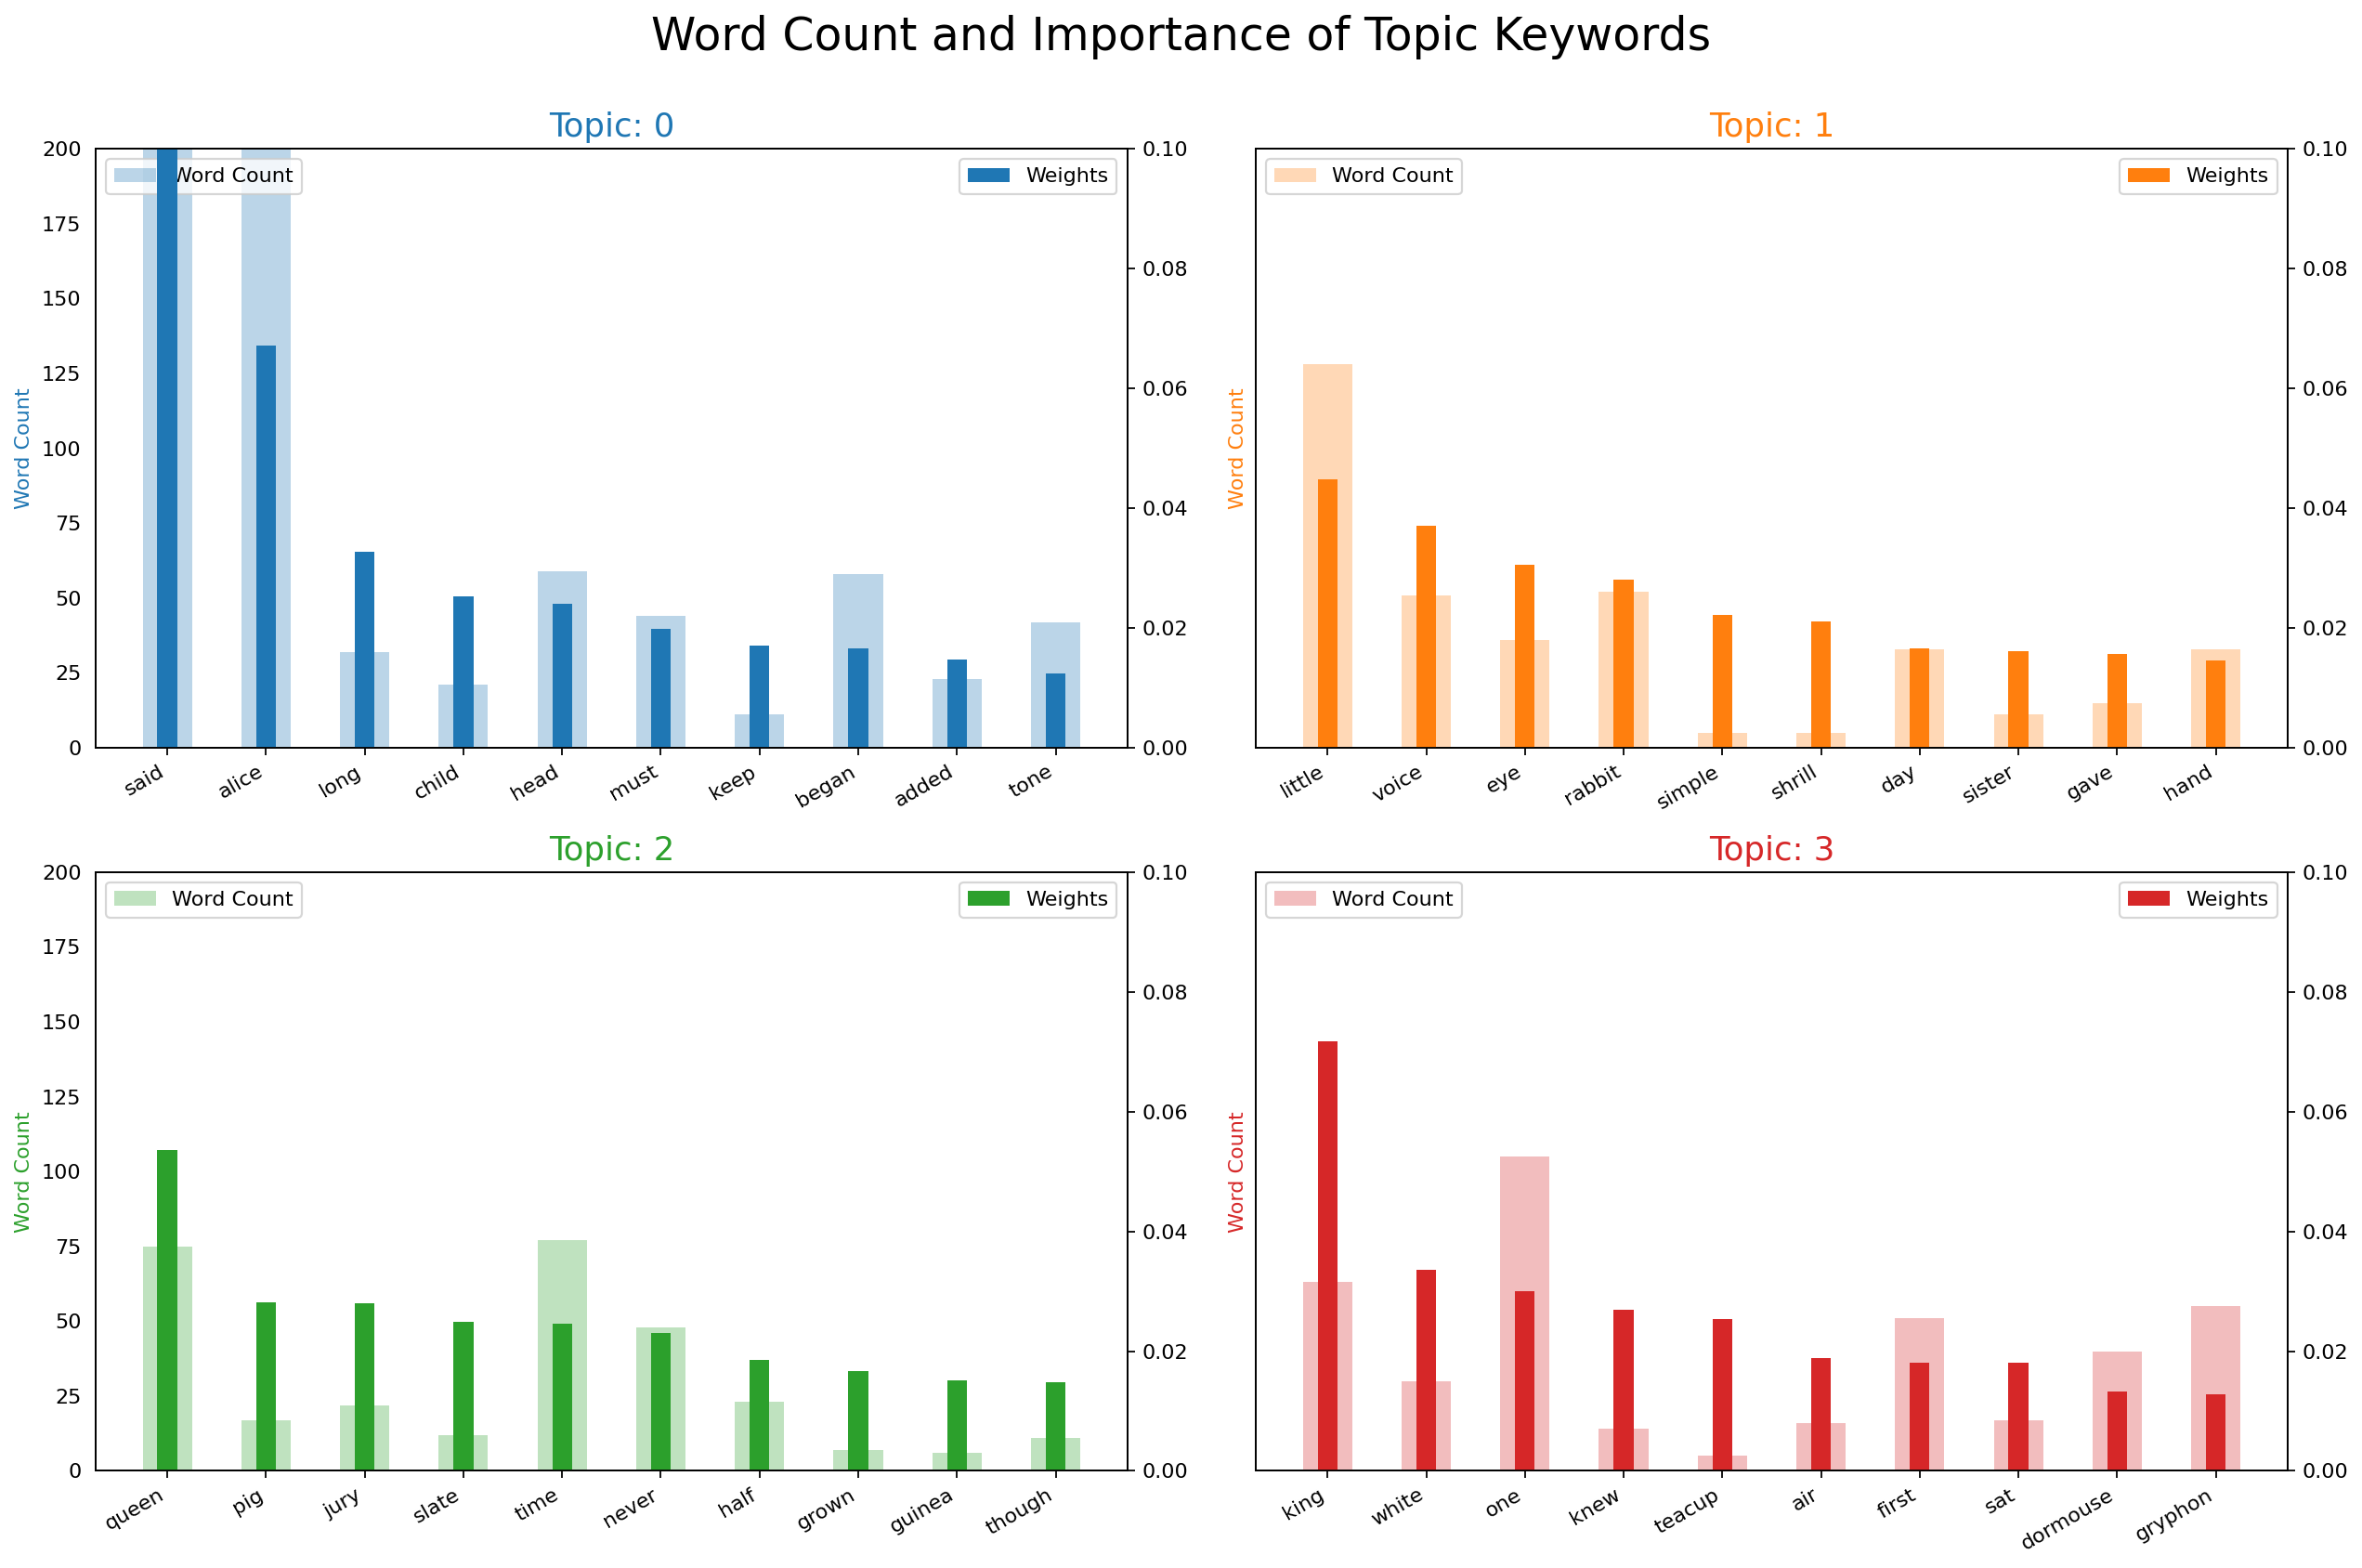

In [20]:
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=out[i], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=out[i], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 200)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

### Sentence Coloring of N Sentences

In [21]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]  # [(1, 1), (6, 1), (7, 3), (18, 1), (33, 1) ...
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            # topic_percs - topic id and its relevance for the doc
            # wordid_topics - word id and list of topics to which it belongs
            # wordid_phivalues - word id and list of topics to which it belongs + respective relevance values
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            # [('alice', 2), ('hole', 0), ('rabbit', 3), ('thought', 2), ('mind', 0), ('ran', 2) ...
            ax.text(0.01, 0.5, "Doc " + str(i-1 + start) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            # getting most relevant topics
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            # drawing for top-1
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-1),
                 fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

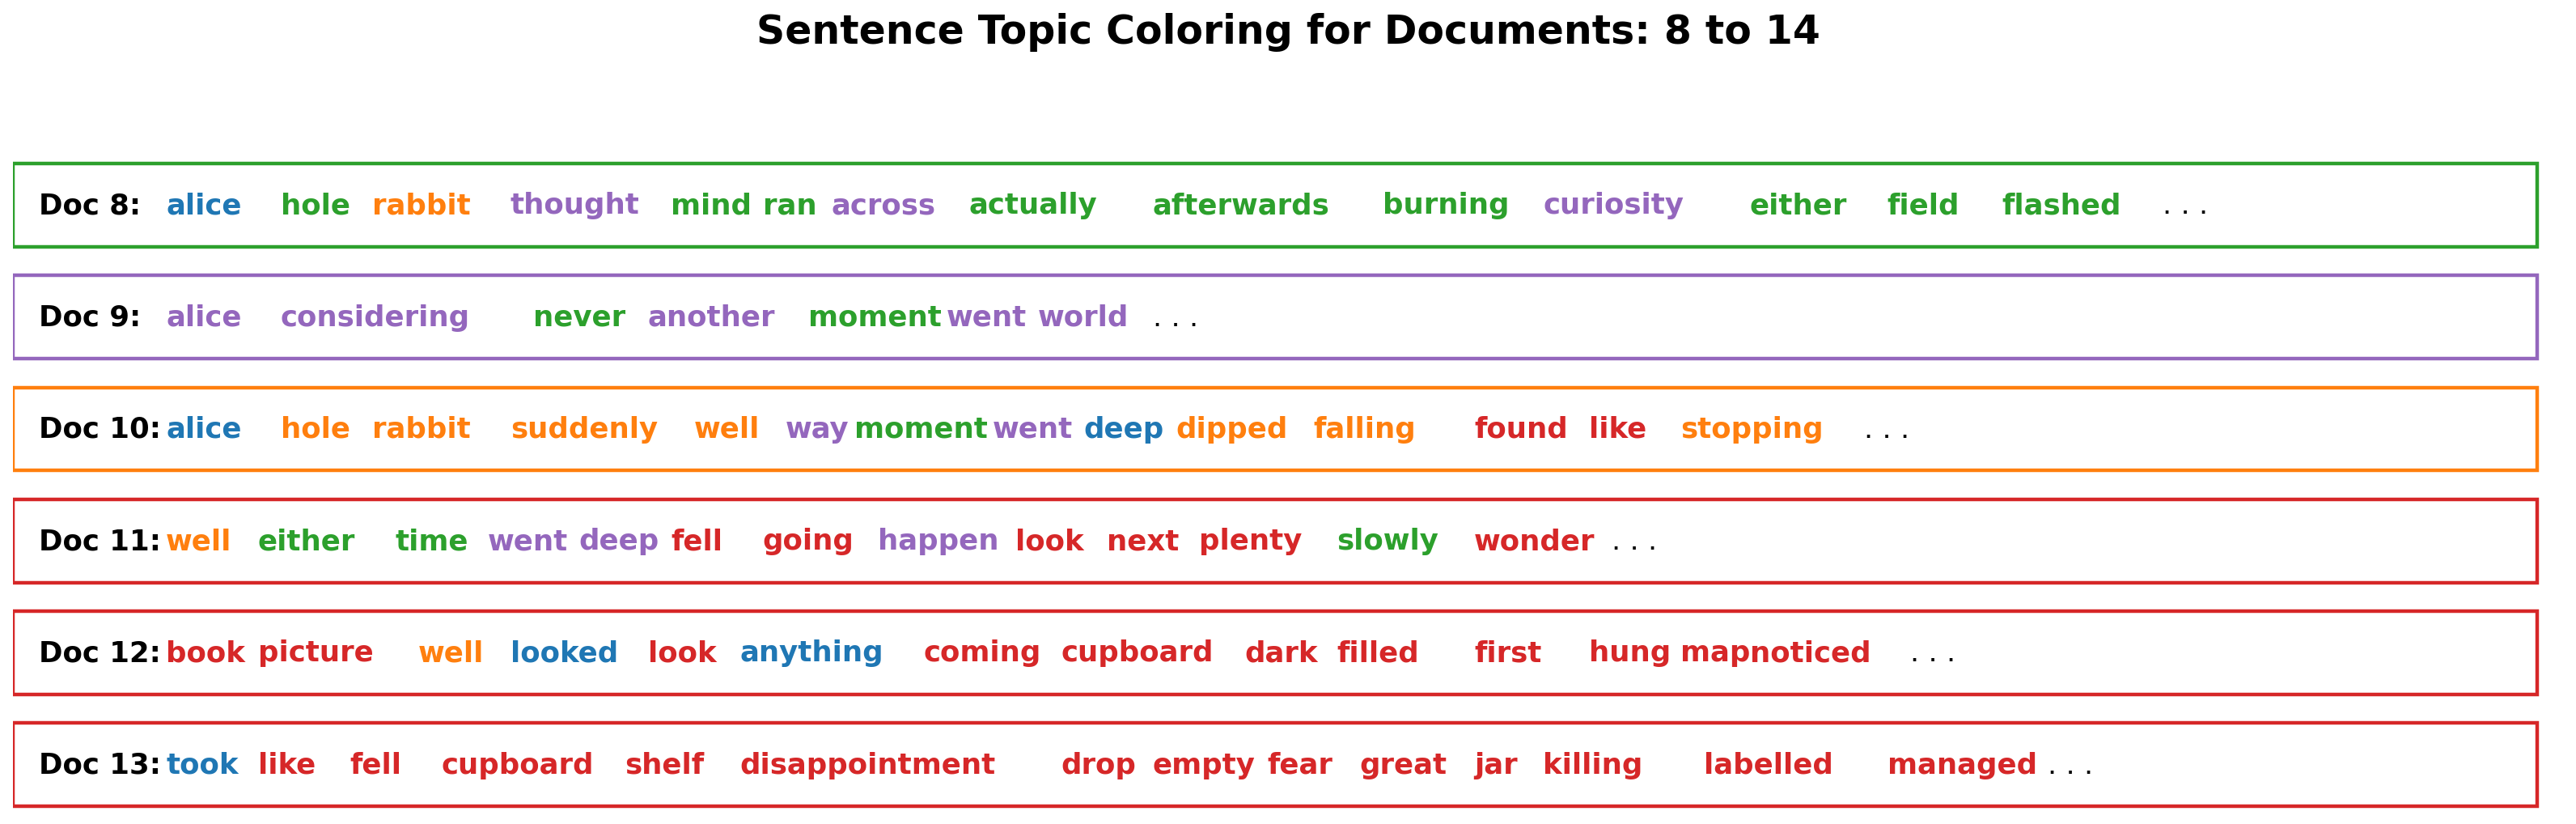

In [22]:
sentences_chart(start=8, end=15)

For the final part we need an additional tool for visualization:

In [23]:
!pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 1.3 MB/s eta 0:00:03
   - -------------------------------------- 0.1/2.6 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.6 MB 1.8 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.6 MB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.6 MB 2.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.6 MB 3.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.6 MB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 1.4/2.6 MB 4.1 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.6 MB 4.0 MB/s eta 0:00:01
   ------------------------------- -------- 2.1/2.6 MB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.6 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 4.7 MB/s eta 0:00:00
   ----------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.309477 -0.029184       1        1  24.514060
3     -0.036727  0.282517       2        1  22.321850
4     -0.108863 -0.086383       3        1  19.320459
2     -0.122872 -0.038559       4        1  17.925964
1     -0.041015 -0.128392       5        1  15.917668, topic_info=            Term        Freq       Total Category  logprob  loglift
147         said  482.000000  482.000000  Default  30.0000  30.0000
1680        king  181.000000  181.000000  Default  29.0000  29.0000
2          alice  215.000000  215.000000  Default  28.0000  28.0000
1352       queen  109.000000  109.000000  Default  27.0000  27.0000
205       little   81.000000   81.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1712   execution   13.458756   21.655195   Topic5  -4.8941   1.3621
235        dream   21.128832   57.867724   Topic5  -4.4431   0.8302
5     wonderland   16.358241   44.180515   Topic5  -4.6990   0.8442
1051      shriek   16.122632   43.737521   Topic5  -4.7135   0.8398
2040      summer   12.459437   22.583015   Topic5  -4.9713   1.2430

[236 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
890       1  0.990951       added
196       2  0.994312         air
2         1  0.861938       alice
2         3  0.139022       alice
1964      1  0.039984      around
...     ...       ...         ...
5         4  0.135806  wonderland
5         5  0.362151  wonderland
176       1  0.970103        word
1546      4  0.914322     writing
686       3  0.988359         yet

[326 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

Additional useful resources for topic modelling:

1. [Tomotopy](https://bab2min.github.io/tomotopy/v/en/): It is written in C++ for speed and provides Python extension, i.e. much faster then gensim

2. [Bertopic](https://maartengr.github.io/BERTopic/index.html): For those who like using BERT for all purposes. It is quite flexible and works pretty well. Note that BERTopic is actually [clustering](https://scikit-learn.org/stable/modules/clustering.html)

In [25]:
! pip install bertopic

     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
      --------------------------------------- 0.1/5.2 MB 1.8 MB/s eta 0:00:03
     - -------------------------------------- 0.3/5.2 MB 2.3 MB/s eta 0:00:03
     ---- ----------------------------------- 0.5/5.2 MB 3.1 MB/s eta 0:00:02
     ----- ---------------------------------- 0.7/5.2 MB 3.1 MB/s eta 0:00:02
     ------ --------------------------------- 0.9/5.2 MB 3.5 MB/s eta 0:00:02
     --------- ------------------------------ 1.2/5.2 MB 3.9 MB/s eta 0:00:02
     ----------- ---------------------------- 1.4/5.2 MB 4.0 MB/s eta 0:00:01
     ------------- -------------------------- 1.8/5.2 MB 4.5 MB/s eta 0:00:01
     --------------- ------------------------ 2.1/5.2 MB 4.7 MB/s eta 0:00:01
     ------------------ --------------------- 2.4/5.2 MB 4.9 MB/s eta 0:00:01
     -------------------- ------------------- 2.7/5.2 MB 5.1 MB/s eta 0:00:01


  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\hdbscan
      copying hdbscan\flat.py -> build\lib.win-amd64-cpython-310\hdbscan
      copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-310\hdbscan
      copying hdbscan\plots.py -> build\lib.win-amd64-cpython-310\hdbscan
      copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-310\hdbscan
      copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-310\hdbscan
      copying hdbscan\validity.py -> build\lib.win-amd64-cpython-310\hdbscan
      copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-310\hdbscan
      creating build\lib.win-amd64-cpython-310\hdbscan\tests
      copying hdbscan\tests\test_flat.py

In [26]:
from bertopic import BERTopic

ModuleNotFoundError: No module named 'bertopic'

In [ ]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([' '.join(sent[1:-1]) for sent in alice])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


In [ ]:
topic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
